In [47]:
import numpy as np
import operator
import matplotlib 
import matplotlib.pyplot as plt
import math
import pickle

In [10]:
def createDataSet():
    dataSet = [[1,1,'yes'],
        [1,1,'yes'],
        [1,0,'no'],
        [0,1,'no'],
        [0,1,'no']]
    labels = ['no surfacing','flippers']
    return dataSet,labels

In [12]:
myData,labels = createDataSet()
myData

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [15]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVect in dataSet:
        currentLabel = featVect[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts.keys():
        prob = labelCounts[key]/numEntries
        shannonEnt -= prob*math.log(prob,2)
    return shannonEnt

In [16]:
calcShannonEnt(myData)

0.9709505944546686

In [19]:
def splitDataSet(dataSet,index,value):
    retDataSet = []
    for featVect in dataSet:
        if featVect[index] == value:
            retDataSet.append(featVect[:index]+featVect[index+1:])
    return retDataSet

In [20]:
splitDataSet(myData,1,1)

[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]

In [23]:
def chooseBestFeatureToSplit(dataSet):
    numFeatrues = len(dataSet[0])-1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in  range(numFeatrues):
        featList = [example[i] for example in dataSet]
        uniqueValues = set(featList)
        newEntroy = 0.0
        for value in uniqueValues:
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet)/len(dataSet)
            newEntroy += prob*calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntroy
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [24]:
chooseBestFeatureToSplit(myData)

0

In [25]:
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse = True)
    return sortedClassCount[0][0]
        

In [27]:
majorityCnt([example[-1] for example in myData])

'no'

In [37]:
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    bestFeature = chooseBestFeatureToSplit(dataSet)
    bestFeatureLabel = labels[bestFeature]
    myTree = {bestFeatureLabel:{}}
    featValues = [example[bestFeature] for example in dataSet]
    uniqueVals = set(featValues)
    subLabels = labels[:bestFeature]+labels[bestFeature+1:]
    for value in uniqueVals:
        myTree[bestFeatureLabel][value] = createTree(splitDataSet(dataSet,bestFeature,value),subLabels)
    return myTree
       

In [38]:
createTree(myData,labels)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [45]:
def classify(inputTree,featLabels,testVect):
    firstLabel = list(inputTree.keys())[0]
    secondDcit = inputTree[firstLabel]
    featIndex = featLabels.index(firstLabel)
    for key in secondDcit.keys():
        if key == testVect[featIndex]:
            if type(secondDcit[key]).__name__ == 'dict':
                classLabel = classify(secondDcit[key],featLabels,testVect)
            else:
                classLabel = secondDcit[key]
    return classLabel

In [41]:
def retrieveTree(i):
    listOfTree = [
        {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
        {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head':{0:'no',1:'yes'}}, 1: 'no'}}}}
    ]
    return listOfTree[i]

In [46]:
tree = retrieveTree(0)
classify(tree,labels,[1,0])

'no'

In [48]:
def storeTree(tree,filename):
    with open(filename,'wb') as fw:
        pickle.dump(fw,tree)
def grabTree(filename):
    with open(filename,'rb') as fr:
        return pickle.load(fr)

In [93]:
decisionNode = dict(boxstyle = 'sawtooth',fc = '0.8')
leafNode = dict(boxstyle = 'round4',fc = '0.8')
arrow_args = dict(arrowstyle = '<-')

def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',xytext = centerPt,textcoords = 'axes fraction',va='center',ha='center',bbox=nodeType,arrowprops = arrow_args)


def plotMidText(cntrPt,parentPt,txtString):
    xMid = (parentPt[0]-cntrPt[0])/2+cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2+cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)
# def createPlot():
#     fig = plt.figure(1,facecolor='white')
#     plt.rc('font', family='SimHei', size=13) 
#     fig.clf()
#     createPlot.ax1 = plt.subplot(111,frameon=False)
#     plotNode('决策节点',(0.5,0.1),(0.1,0.5),decisionNode)
#     plotNode('叶子节点',(0.8,0.1),(0.3,0.8),leafNode)
#     plt.show()
# createPlot()

In [118]:
def getNumLeaf(inputTree):
    numLeafs = 0
    firstLabel = list(inputTree.keys())[0]
    secondDcit = inputTree[firstLabel]
    for key in secondDcit.keys():
        if type(secondDcit[key]).__name__ == 'dict':
            numLeafs += getNumLeaf(secondDcit[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(inputTree):
    maxDepth = 0
    firstLabel = list(inputTree.keys())[0]
    secondDcit = inputTree[firstLabel]
    for key in secondDcit.keys():
        if type(secondDcit[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDcit[key])
        else:
            thisDepth = 1 
        if thisDepth > maxDepth : maxDepth = thisDepth
    return maxDepth

In [121]:
getNumLeaf(retrieveTree(1))

4

In [117]:
getTreeDepth(retrieveTree(1))

3

In [113]:
def plotTree(myTree,parentPt,nodeText):
    numLeafs = getNumLeaf(myTree)
    numTreeDepth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    cntrPt = (plotTree.xOff + (1.0+ numLeafs)/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt,nodeText)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

In [108]:
def createPlot(inTree):
    fig = plt.figure(1,facecolor = 'white')
    fig.clf()
#     axprops = dict(xticks = [],yticks=[])
#     createPlot.ax1 = plt.subplot(111,frameon = False,**axprops)
    createPlot.ax1 = plt.subplot(111,frameon = False)
    plotTree.totalW = getNumLeaf(inTree)
    plotTree.totalD = getTreeDepth(inTree)
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree,(0.5,1.0),'')
    plt.show()

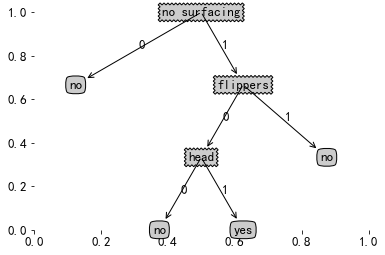

In [119]:
createPlot(retrieveTree(1))

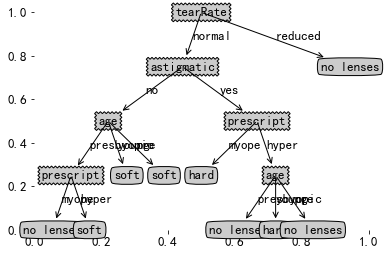

In [120]:
with open('./lenses.txt','r') as rf:
    lenses = [example.strip().split('\t') for example in rf.readlines()]
lensesLabels = ['age','prescript','astigmatic','tearRate']
lensesTree = createTree(lenses,lensesLabels)    
createPlot(lensesTree)